In [1]:
# import things we already know about:
from IPython.display import Image
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
%matplotlib inline

### Lecture 23:

- Learn about the concept of Graphical User Interfaces
- Learn how to make a GUI in a Jupyter notebook
- Learn how to export the GUI to a command line  program


### What are GUIs and why do I care?

- GUI (pronounced "gooey"),  stands for "Graphical User Interface".  GUIs are all the programs you use that do stuff for you without your needing to know a word of programming.  
- There are lots of packages that make GUIs in Python, e.g., Tkinter, wxPython, QT, and so on.  These are very complicated and cannot be learned in single lecture.  Fortunately for us, there is now a package called **PySimpleGUI** which does 80% of what the complete packages do with much less hassle.  
- **PySimpleGUI**  actually just calls Tkinter (the first python GUI maker) so it is really a "wrapper" program that does all the hard work for us.  
- **PySimpleGUI**  can be run inside a notebook if you take special precautions!  When you are happy with your GUI, you can save it as a text file (using tricks we learned way back in Lecture 1!), make it executable and run it from the command line, share it with your non-programming friends and be a hero.  

### GUI basics
- GUIs make windows with "widgets" such as popup windows, buttons, text entry boxes, check boxes, radio buttons, menu options, sliders, graphics and more.  
- Widgets are called "elements" in **PySimpleGUI**.  
- GUIs are composed of sub-windows that are each  "classes" under the hood. But with **PySimpleGUI** , you do not need to know the details (thank goodness!). 
- Basically, the GUI stands-by until you click on something. When you interact with a GUI by clicking on, for example the  "submit", "ok", or "cancel" button, you create an "event". Then the GUI does something.  
- The examples in this lecture work in the notebook and as command line scripts. 
- On a PC you can create an .EXE file and just double click on it. \[You have to look up how yourself!\]
- The best approach to constructing a GUI of your own is to hunt through all the demo GUIs from the author, MikeTheWatchGuy, at this website: https://github.com/MikeTheWatchGuy/PySimpleGUI/tree/master/DemoPrograms. Find the one closest to your needs and just modify it to suit.   Note that MikeTheWatchGuy is a very busy guy and is constantly updating the content. 

### Further handy links
- https://github.com/MikeTheWatchGuy/PySimpleGUI/blob/master/docs/tutorial.md

- https://opensource.com/article/18/8/pysimplegui

- https://www.reddit.com/r/Python/comments/a1mj0p/pysimplegui_under_the_hood/
- www.codeskulptor.org/demos.html#tabs-Hall-of-Fame



## Setting up the Python Environment

If you are using a computer that does not have **PySimpleGUI**  installed, run the pip command only once! 
Uncomment the !pip command, run it, then comment it back and don't do this again!

Once installed, just import it to use it.   


In [5]:
#!pip install pysimplegui
import PySimpleGUI as sg


### Popup windows

This is a super simple introduction to GUIs.  It just 'pops up' and disappears when you click on the OK button.  

In [4]:
sg.Popup('Hi there SIO 113 class!','Click OK to exit.')

'OK'

### The world's simplest GUI

The popup window didn't do much.  A "real" GUI displays a window, retrieves user's responses and returns them for some purpose.  So, for a more useful GUI we need the following elements:  the basic format of a **PySimpleGUI**  program is:

- Define the layout of the window.  In **PySimpleGUI**, this is done as a list of lists whereby each row in the window is it's own list of elements.  
- Create a window object using the function **sg.Window().Layout()** with the argument of **.Layout()** being the list of lists defining the layout.
- Display the window and retrieve the user's responses.  
- Close the window



Here is a super simple GUI that retrieves text typed into a text input box.    It will look like this:  

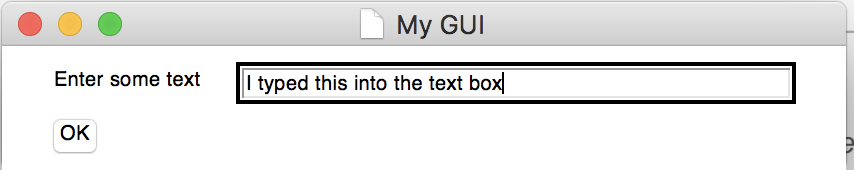

In [5]:
Image('Figures/simpleGUI.png',width=500)

Here's the code: 

In [6]:
# layout is the list of lists that sets up the layout of the window: 
# sg.Text() and sg.InputText() will be on the first row and sg.OK() will be on the second. 
layout = [ [sg.Text('Enter some text'), sg.InputText()],[sg.OK()]]        
#sg.Window creates the window object with the desired layout 
# the keep_on_top=True brings the window to the top
window = sg.Window('My GUI',keep_on_top=True).Layout(layout)
# window.Read() displays the window and retrieves the user's responses
event, sometext = window.Read()
# window.Close() closes the window (very important for use in a notebook!)
window.Close()
# here we do something with what we retrieved - print it! 
print(sometext)



['I typed this into the text box']


### More useful GUIs

That was fun but also not particularly useful.  The GUIs we are used to have things like check boxes, drop down menus, browsing for files, reading in files, sliders, and so on.  These things are called "widgets" in most GUI environments. For some reason, PySimpleGUI calls them "elements", so so will we.  

PySimpleGUI has a LOT of elements to choose from.  For a  complete  (and growing)  list look at this website:  https://github.com/MikeTheWatchGuy/PySimpleGUI/blob/master/docs/tutorial.md

The best way to see how they work is to look at some code that uses them, run it, and see what happens. 


We'll make a window that looks like this:


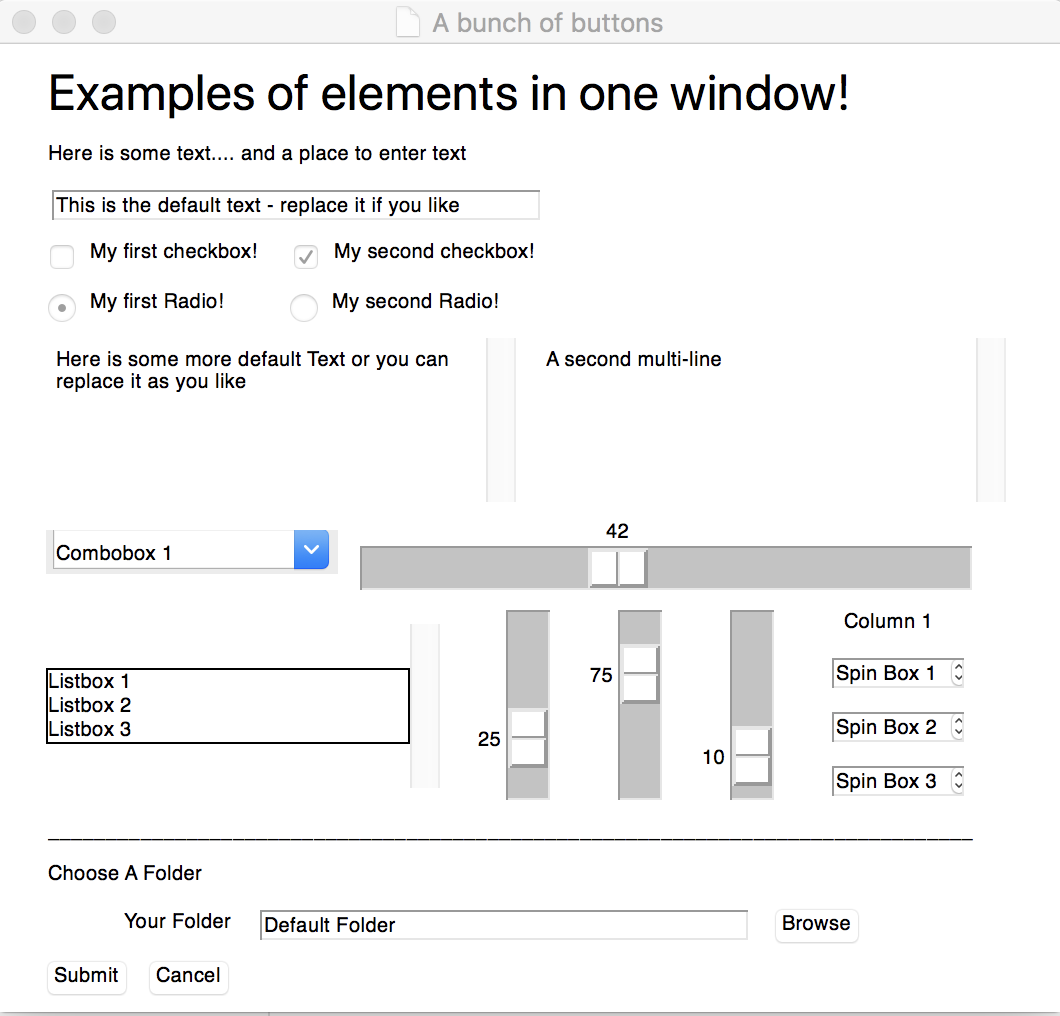

In [8]:
Image('Figures/ExampleElementsGUIinit.png',width=500)

This GUI uses  these elements:
- **sg.Text()** and **sg.InputText()** as before
- "spin" boxes that allows the user to choose a value from a list: **sg.Spin()**.
- check boxes: **sg.Checkbox()**
- radio buttons: **sg.Radio()**
- Multi-line input: **sg.Multiline()**
- list of options in a "combobox":  **sg.Combobox()**
- sliders:  **sg.Slider()**
- list of options in a "listbox": **sg.Listbox()**
- a subwindow with its own options:  **sg.Column()**
- you can browse for a particular folder:  **sg.FolderBrowse()**
- a few buttons to return or cancel the input:  **sg.Submit(), sg.Cancel()**
- a way to close the window at the end.  

It has the same basic structure of all of the PySimpleGUIs in that we set up the layout first, including the layout of a subwindow (**sg.Column()**) that uses its own layout (mini_layout). 

In [7]:
mini_layout = [[sg.Text('Column 1', justification='center', size=(10, 1))],      
           [sg.Spin(values=('Spin Box 1', '2', '3'), initial_value='Spin Box 1')],      
           [sg.Spin(values=('Spin Box 1', '2', '3'), initial_value='Spin Box 2')],      
           [sg.Spin(values=('Spin Box 1', '2', '3'), initial_value='Spin Box 3')]]      
master_layout = [      
    [sg.Text('Examples of elements in one window!', size=(30, 1),font=("Comic Sans", 25))],      
    [sg.Text('Here is some text.... and a place to enter text')],      
    [sg.InputText('This is the default text - replace it if you like')],   # one line of text entry   
    [sg.Checkbox('My first checkbox!'), sg.Checkbox('My second checkbox!', default=True)],      
    [sg.Radio('My first Radio!     ', "RADIO1", default=True), sg.Radio('My second Radio!', "RADIO1")],      
    [sg.Multiline(default_text='Here is some more default Text or you can replace it as you like', size=(35, 3)),      
     sg.Multiline(default_text='A second multi-line', size=(35, 3))],      
    [sg.InputCombo(('Combobox 1', 'Combobox 2'), size=(20, 3)),      
     sg.Slider(range=(1, 100), orientation='h', size=(34, 20), default_value=42)],      
    [sg.Listbox(values=('Listbox 1', 'Listbox 2', 'Listbox 3'), size=(30, 3)),      
     sg.Slider(range=(1, 100), orientation='v', size=(5, 20), default_value=25),      
     sg.Slider(range=(1, 100), orientation='v', size=(5, 20), default_value=75),      
     sg.Slider(range=(1, 100), orientation='v', size=(5, 20), default_value=10),      
     sg.Column(mini_layout)],      
    [sg.Text('_'  * 80)],   # this just makes a line across the window   
    [sg.Text('Choose A Folder', size=(35, 1))],      
    [sg.Text('Your Folder', size=(15, 1), auto_size_text=False, justification='right'),      
     sg.InputText('Default Folder'), sg.FolderBrowse()],      
    [sg.Submit(), sg.Cancel()]      
]      
      
window = sg.Window('A bunch of buttons', \
                   default_element_size=(40, 1),keep_on_top=True).Layout(master_layout)
event, values = window.Read()


# this prints all the values of the elements that you fiddled with. 
# If you don't do anything, it will just print a bunch of "None"s - otherwise it will tell you what you did.
print(event)
print(values)
window.Close()


Cancel
['This is the default text - replace it if you like', False, True, True, False, 'Here is some more default Text or you can replace it as you like\n', 'A second multi-line\n', 'Combobox 1', 42, [], 25, 75, 10, 'Spin Box 1', 'Spin Box 2', 'Spin Box 3', 'Default Folder']


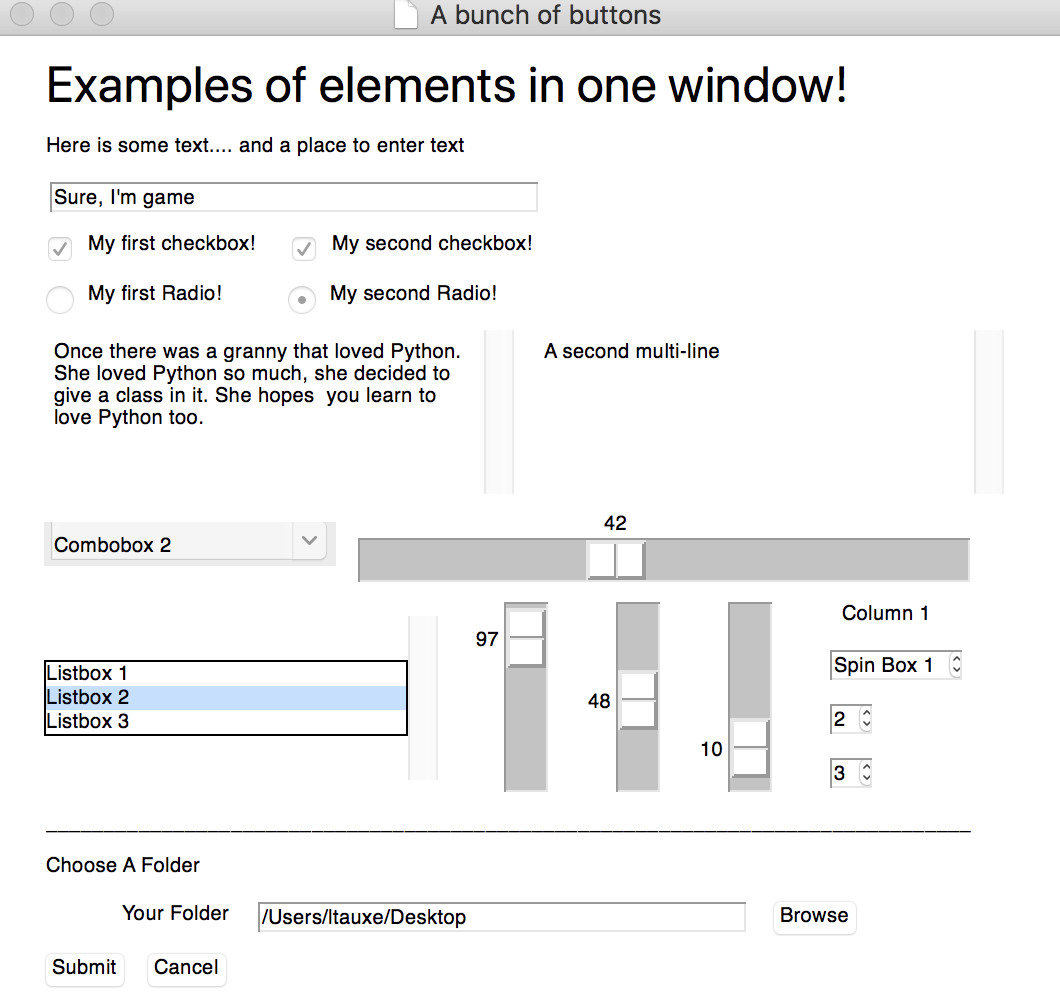

In [11]:
#To set these values, the window looked like this:  
Image('Figures/ExampleElementsGUI.png',width=500)

You can imagine how you could build in the stuff gotten from the GUI into a script that could do all sorts of things.  One fun thing would be to make a plot with some data in it.  

### Embedding a plot into your GUI

To accomplish this, we need a way to:
- make a GUI that retrieves the desired input file for plotting: [get_file](#get_file) 
- make a matplotlib figure: [make_topo_map](#make_topo_map)
- make a way to put a matplotlib figure onto a "canvas". [draw_figure](#draw_figure)
- create a "canvas"  to draw on and put it into a window: [window_maker](#window_maker)
- display the GUI with **window.Read()** as before and admire your work. [window_maker](#window_maker)
- make a **main()** program to put it all together. [main](#main)



### What should we put in our GUI window?   

I found a website hosted at Scripps for seafloor bathymetry (created by our own Prof. David Sandwell) at https://topex.ucsd.edu/   If you clck on the "global topography link, you "get an ASCII XYZ file" for anywhere you like (https://topex.ucsd.edu/cgi-bin/get_data.cgi).  The file Datasets/socal_elevation.txt has downloaded data for the "Southern California Border Lands"  around San Diego between latitudes 32.5 and 34.25$^{\circ}$ and longitudes 120.5 and 115.5$^{\circ}$W.   

Let's plot that! 

### get_file

In [10]:
def get_file():
    """
    makes a GUI that retrieves the desired file name for plotting
    Inputs: 
        None
    Returns:
        path_to_file:  str
             path to the desired file
    """
    import PySimpleGUI as sg
    layout = [[sg.InputText('Filename'),sg.FileBrowse()],[sg.OK()]  ]  
    window = sg.Window('Simple data entry window',keep_on_top=True).Layout(layout).Finalize()
    button, values = window.Read()
    window.Close()
    path_to_file=values[0]
    return path_to_file



### make_topo_map

In [11]:
# make a matplotlib figure
def make_topo_map(path_to_file):
    """ Open path_to_file in a pandas DataFrame, and make a topographic map.
        Inputs: 
            path_to_file: str
                the path to the file with longitude, latitude, elevation
        Outputs:
            fig: matplotlib figure object
    """
    import pandas as pd
    import cartopy.crs as ccrs
    import matplotlib.pyplot as plt
    import numpy as np
    data=pd.read_csv(path_to_file,header=None,delim_whitespace=True)
    data.columns=['lon','lat','elev']
    x=data.lon.unique()
    y=data.lat.unique()
    z=data.elev.values
    Z=np.reshape(z,newshape=(len(y),len(x)))

    proj = ccrs.LambertConformal(central_longitude=x.mean(), central_latitude=y.mean())
    fig = plt.figure(figsize=(6,6), frameon=True) # you need this frameon to be true
    ax = plt.axes(projection=proj)
    plt.pcolormesh(x,y,Z,cmap='RdBu_r',shading='gouraud',transform=ccrs.PlateCarree())
    return fig

### draw_figure

To create the canvas, **PySimpleGUI** uses a special "backend" package in **matplotlib** called **backend_tkagg** for this.  For more about this powerful puppy, see: https://matplotlib.org/api/backend_tkagg_api.html.  \[ Historical note: **Tk** is an old Unix based plotting package which has been used in Python (called **Tkinter** for Tk interface) and **tkagg** is a particular "backend" for **matplotlib** still in use today.\]  


In [12]:
## put a figure onto a canvas = this is from MikeTheWatchGuy
def draw_figure(canvas, figure, loc=(0, 0)):
    """ Draw a matplotlib figure onto a Tk canvas

    loc: location of top-left corner of figure on canvas in pixels.

    Inspired by matplotlib source: lib/matplotlib/backends/backend_tkagg.py
    """
    from matplotlib.backends.backend_tkagg import FigureCanvasAgg
    import matplotlib.backends.tkagg as tkagg
    import tkinter as Tk

    # make a Tkagg canvas
    figure_canvas_agg = FigureCanvasAgg(figure)
    figure_canvas_agg.draw()
    # get some dimensions for our figure's bounding box (bbox)
    figure_x, figure_y, figure_w, figure_h = figure.bbox.bounds
    figure_w, figure_h = int(figure_w), int(figure_h)
    # make a "photo" object with correct dimensions out of the canvas
    photo = Tk.PhotoImage(master=canvas, width=figure_w, height=figure_h)
    # put the figure on the photo
    canvas.create_image(loc[0] + figure_w/2, loc[1] + figure_h/2, image=photo)
    tkagg.blit(photo, figure_canvas_agg.get_renderer()._renderer, colormode=2)
    # return the photo object
    return photo



### window_maker

Now we have to make the GUI part to take a matplotlib figure object and put it a GUI window.  
To place the figure on the canvas, we can borrow code from this demo program: https://github.com/MikeTheWatchGuy/PySimpleGUI/blob/master/DemoPrograms/Demo_Matplotlib.py to create a little function called **draw_figure()** 
Here is the bit borrowed from MikeTheWatchGuy.  


In [13]:
# make a canvas and put the figure on it - make the window
def window_maker(fig,title="Embedded Matplotlib Figure"):
    """ Makes a GUI window to put a matplotlib figure in.  modified from MikeTheWatchGuy
    Inputs: 
        fig: matplotlib figure object
        title: desired title for the window - default is 'Embedded Matplotlib Figure'
    """
    import PySimpleGUI as sg

    # get the dimensions of the figure
    figure_x, figure_y, figure_w, figure_h = fig.bbox.bounds
    # define the window layout with a title, a canvas and an OK button
    layout = [[sg.Text(title, font='Any 18')],
          [sg.Canvas(size=(figure_w, figure_h), key='canvas')],
          [sg.OK(pad=((figure_w / 2, 0), 3), size=(4, 2))]]

    # create the window and show it without the plot
    window = sg.Window('Figure in a Window', force_toplevel=True).Layout(layout)
    window.Finalize() # needed to access the canvas element prior to reading the window
    
    # get the canvas element from the window
    canvas=window.FindElement('canvas').TKCanvas
        # show it all again and retrieve buttons
    # add the plot to the canvas
    fig_photo = draw_figure(canvas, fig)
    event, values = window.Read()
    window.Close()




### main
A little function to pull it all together

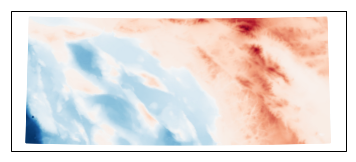

In [14]:
def main():
    # get the file name
    path_to_file=get_file()
    # read in the data and make the mesh
    # make the map
    fig=make_topo_map(path_to_file)
    # make the window
    window_maker(fig,title=path_to_file)


    
# make it so

main()


So that worked!   Now I promised to show you how to make a command line script. 

###  Make a command line version

To make a command line version, we just put all the pieces into a new notebook (**GUI_standalone.ipynb**). There are a few additional tricks to this.  First, it is wise to delete whatever you saved before, so the first cell of the new notebook should be something like this: 


In [18]:
!rm ./GUI_command_line.py

Then to copy all the relevent code blocks into the next cell.  You will need these functions: 
- get_file
- make_topo_map
- draw_figure
- window_maker
- main

and then a call to main() at the end.  

To actually write the cell to a file, you need to put this "Jupyter notebook magic command"  in it too: 

%%writefile PATH_TO_YOUR_SCRIPT_NAME

I used ./GUI_command_line.py in the notebook file GUI_command_line.ipynb.

Finally, you need to make the file executable (at least on in MacOS), so the final line of code in the command line script maker should be: 

After you run all the cells in the GUI_command_line_maker.ipynb, open a command line window and type: ./GUI_command_line.py   This should work just like in this notebook!   

Or you can just run it from the notebook.  



In [3]:
!./GUI_command_line.py

objc[54687]: Class FIFinderSyncExtensionHost is implemented in both /System/Library/PrivateFrameworks/FinderKit.framework/Versions/A/FinderKit (0x7fffa7468c90) and /System/Library/PrivateFrameworks/FileProvider.framework/OverrideBundles/FinderSyncCollaborationFileProviderOverride.bundle/Contents/MacOS/FinderSyncCollaborationFileProviderOverride (0x114ccbcd8). One of the two will be used. Which one is undefined.


### Adding whistles and bells

Some more things you might want to add:  
- A way to save the plots that you make
- More complicated maps with things like lat/lon tick marks.
- Different projections

Anyway, you can do 80% of what the more sophisticated GUI environments can do and WAY faster and easier.    Have fun with GUIs.  